In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/orders.csv', parse_dates=[
    'order_date', 'delivery_date', 'expected_delivery_date'
])

df.head()


,order_id,order_date,delivery_date,expected_delivery_date,order_status,region
0,1001,2024-01-02,2024-01-05,2024-01-04,Delivered,North
1,1002,2024-01-03,2024-01-06,2024-01-05,Delivered,South
2,1003,2024-01-04,2024-01-08,2024-01-06,Delivered,East
3,1004,2024-01-05,NaT,2024-01-07,Pending,West
4,1005,2024-01-06,2024-01-06,2024-01-06,Delivered,North


In [3]:
df['delivery_time'] = (df['delivery_date'] - df['order_date']).dt.days

In [4]:
total_orders = len(df)
delivered_orders = df[df['order_status'] == 'Delivered']

fulfillment_rate = (len(delivered_orders) / total_orders) * 100
avg_delivery_time = delivered_orders['delivery_time'].mean()

late_deliveries = delivered_orders[
    delivered_orders['delivery_date'] > delivered_orders['expected_delivery_date']
]

late_delivery_pct = (len(late_deliveries) / len(delivered_orders)) * 100


In [7]:
region_performance = delivered_orders.groupby('region')['delivery_time'].mean()
region_performance


region
East     4.0
North    1.5
South    3.0
West     3.0
Name: delivery_time, dtype: float64

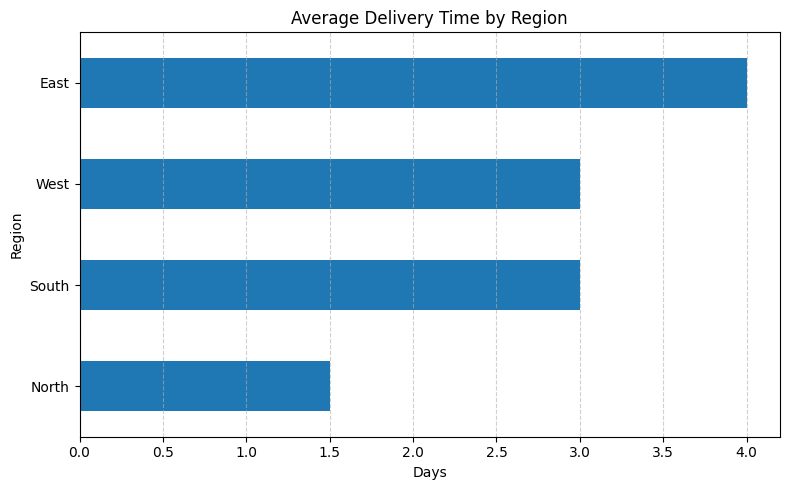

In [8]:
plt.figure(figsize=(8,5))
region_performance.sort_values().plot(kind='barh')
plt.title('Average Delivery Time by Region')
plt.xlabel('Days')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


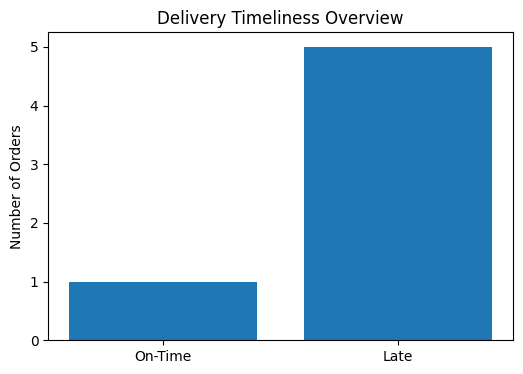

In [9]:
delivery_status = ['On-Time', 'Late']
counts = [
    len(delivered_orders) - len(late_deliveries),
    len(late_deliveries)
]

plt.figure(figsize=(6,4))
plt.bar(delivery_status, counts)
plt.title('Delivery Timeliness Overview')
plt.ylabel('Number of Orders')
plt.show()


## Dashboard Metrics Summary

If deployed as a dashboard, the following KPIs would be tracked in real time:

- Total Orders
- Order Fulfillment Rate (%)
- Average Delivery Time (days)
- Late Delivery Percentage (%)
- Regional Delivery Performance

Such a dashboard would support operations managers in identifying delays early and optimizing fulfillment workflows.
